# Clustering

Modelos de clusterização do Scikit Learn

In [1]:
import os

os.environ['OMP_NUM_THREADS'] = '9'

In [2]:
import pandas as pd

DATA = "../data/customers_data_clean.csv"

df = pd.read_csv(DATA)

df.head()


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

## Pré Processamento dos dados

- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

- Com base nas documentações apresentadas é possivel compreender que o StandardScaler é mais adequado quando as variáveis ou colunas já tem dados com comportamento proximado de uma distribuição Gaussiana ou uma distribuição normal.
- Dessa forma será analisadas as colunas numéricas para averiguar esse comportamento, colunas que não tiverem esse comportamento, será adotado outro metodo diferente do StandardScaler

In [4]:
numerical_features = df.select_dtypes(include='number').columns
len(numerical_features)

32

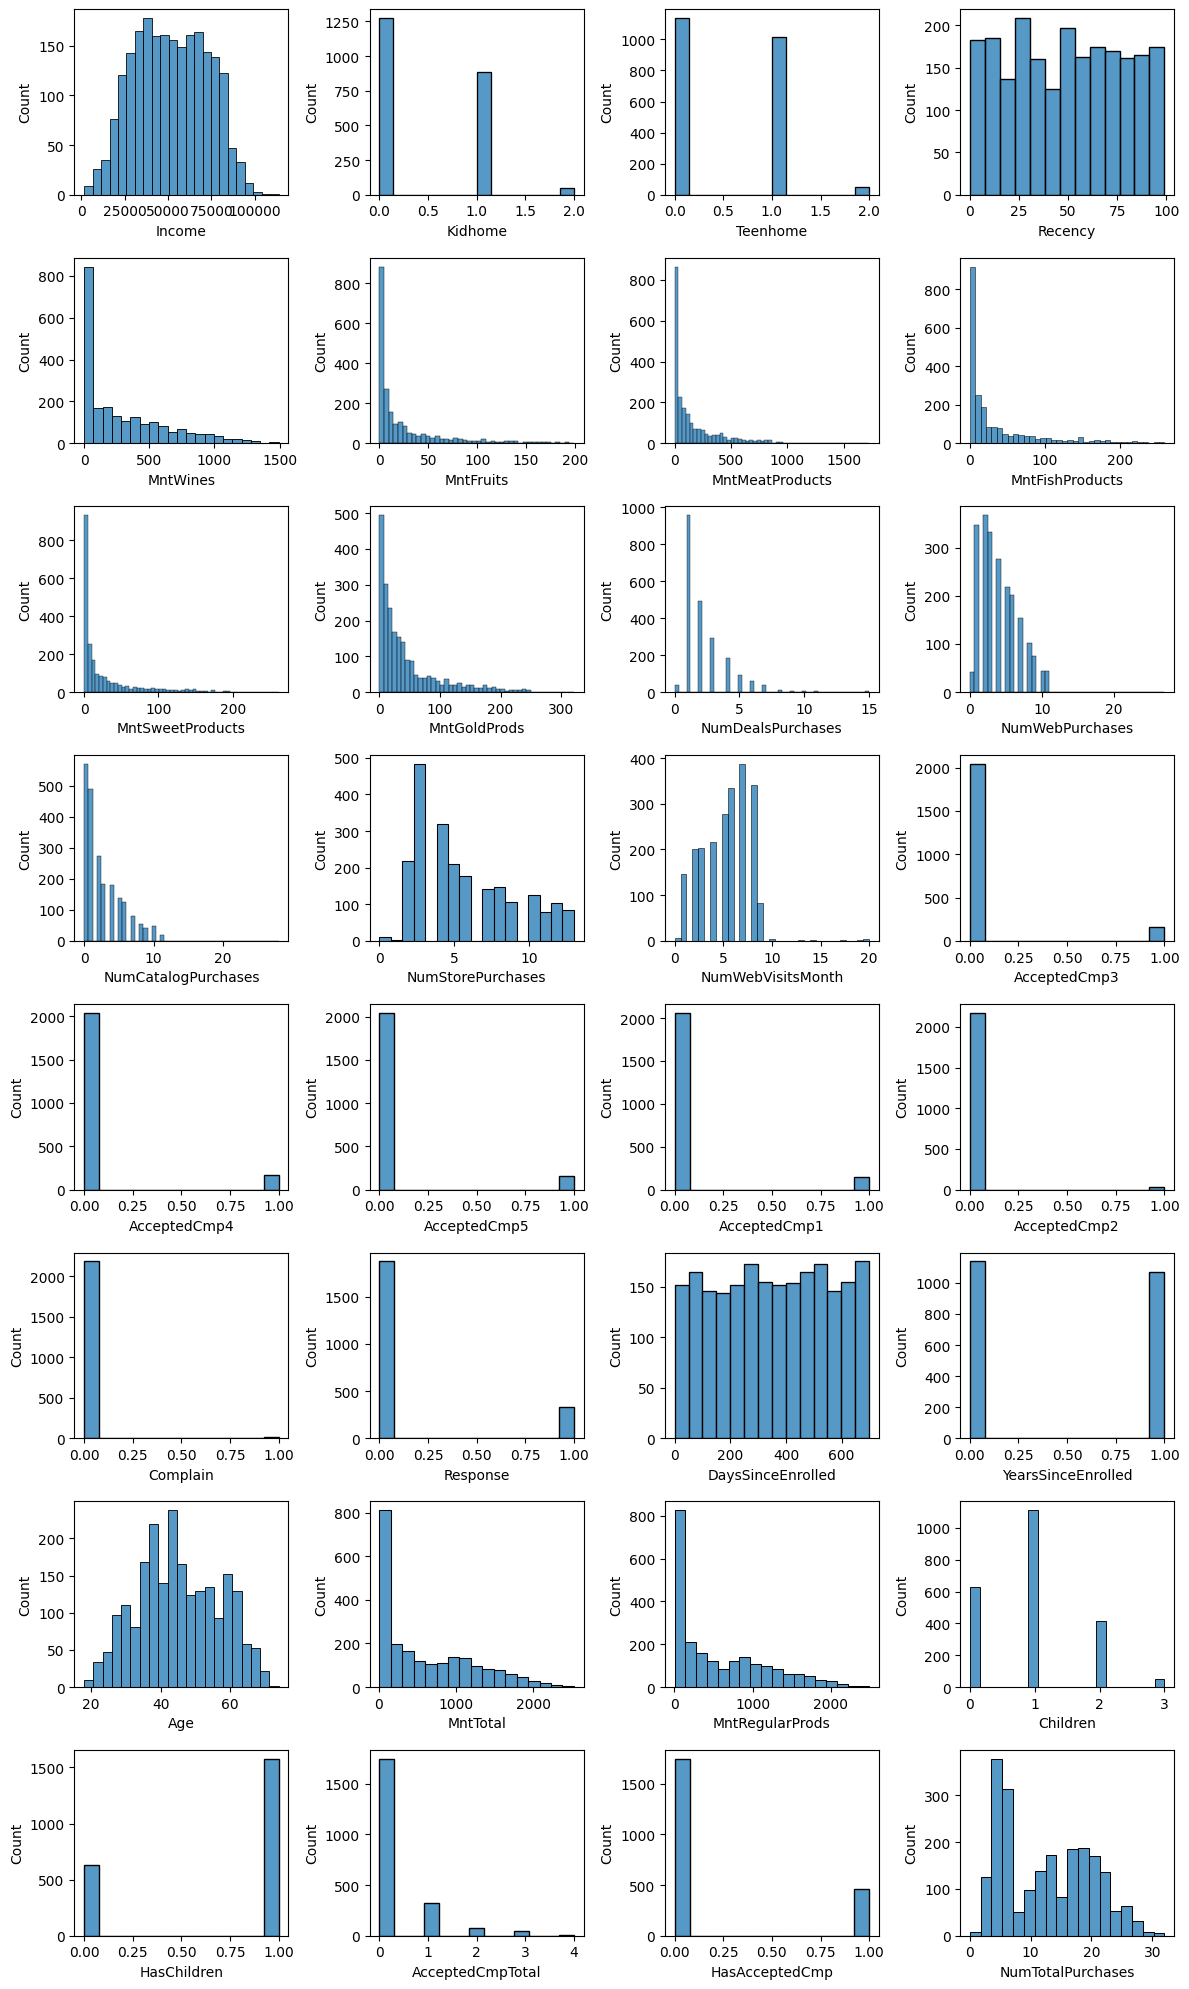

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fg, axs = plt.subplots(nrows=8, ncols=4, figsize=(12,20), tight_layout=True)

for ax, features in zip(axs.flatten(), numerical_features):
    sns.histplot(data=df, x=features, ax=ax)

plt.show();

- As colunas: 'Income' e 'Age são as unicas que apresentam comportamento mais proximo de uma distribuição normal. Dessa forma metodo de StandardScale pode ser usados nelas.
- Algumas colunas apresentam alguns valores de 0 e 1 que podem ser considerados como categóricos.
- Colunas de aceitação de campanha e colunas que demonstram quantidades de filhos podem ser caracterizados como variaveis categóricas.
- Distribuições mais uniformes como 'Recency' e "DaysSinceEnrolled" não se adequa bem ao StandardScaler, método de MinMaxScaler pode ser mais eficiente.
- Colunas que tem inicio como 'Mnt'  e 'Num' não apresentam comportamento de distribuição Normal, dessa forma usar StandardScaler não seria uma escolha adequada.

In [6]:
one_hot_cols = [
    'Education',
    'Marital_Status',
    'AgeGroup',
    'HasChildren',
    'HasAcceptedCmp',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Complain',
    'Response',
    'Kidhome',
    'Teenhome',
    'YearsSinceEnrolled',
    'Children',
    'AcceptedCmpTotal'
]

standard_cols = [
    'Income',
    'Age',
]

power_cols = df.columns[df.columns.str.startswith('Mnt') | df.columns.str.startswith('Num')].tolist()

minmax_cols = [col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols]

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ('One-hot', OneHotEncoder(), one_hot_cols),
        ('standard', StandardScaler(), standard_cols),
        ('minmax', MinMaxScaler(), minmax_cols),
        ('power', PowerTransformer(), power_cols)
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.31554348,
         1.3107051 ,  1.22117404],
       [ 0.        ,  0.        ,  1.        , ..., -1.44715317,
        -1.45392396, -1.31943784],
       [ 0.        ,  0.        ,  1.        , ...,  0.65850681,
         0.68796397,  1.02538786],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.06873119,
         1.10901986,  0.81760731],
       [ 0.        ,  0.        ,  0.        , ...,  0.72839023,
         0.73883475,  1.12466774],
       [ 0.        ,  0.        ,  0.        , ..., -0.44741865,
        -0.42493797, -0.5090171 ]])

In [8]:
preprocessing.get_feature_names_out()

array(['One-hot__Education_2n Cycle', 'One-hot__Education_Basic',
       'One-hot__Education_Graduation', 'One-hot__Education_Master',
       'One-hot__Education_PhD', 'One-hot__Marital_Status_Partner',
       'One-hot__Marital_Status_Single', 'One-hot__AgeGroup_18-30',
       'One-hot__AgeGroup_31-45', 'One-hot__AgeGroup_46-60',
       'One-hot__AgeGroup_61+', 'One-hot__HasChildren_0',
       'One-hot__HasChildren_1', 'One-hot__HasAcceptedCmp_0',
       'One-hot__HasAcceptedCmp_1', 'One-hot__AcceptedCmp1_0',
       'One-hot__AcceptedCmp1_1', 'One-hot__AcceptedCmp2_0',
       'One-hot__AcceptedCmp2_1', 'One-hot__AcceptedCmp3_0',
       'One-hot__AcceptedCmp3_1', 'One-hot__AcceptedCmp4_0',
       'One-hot__AcceptedCmp4_1', 'One-hot__AcceptedCmp5_0',
       'One-hot__AcceptedCmp5_1', 'One-hot__Complain_0',
       'One-hot__Complain_1', 'One-hot__Response_0',
       'One-hot__Response_1', 'One-hot__Kidhome_0', 'One-hot__Kidhome_1',
       'One-hot__Kidhome_2', 'One-hot__Teenhome_0', 'One-

In [9]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns = preprocessing.get_feature_names_out()
)

df_scaled.head()

,One-hot__Education_2n Cycle,One-hot__Education_Basic,One-hot__Education_Graduation,One-hot__Education_Master,One-hot__Education_PhD,One-hot__Marital_Status_Partner,One-hot__Marital_Status_Single,One-hot__AgeGroup_18-30,One-hot__AgeGroup_31-45,One-hot__AgeGroup_46-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProds,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.387173,1.089046,0.753752,1.332973,1.747828,-0.425453,0.700269,1.315543,1.310705,1.221174
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.976308,-0.947497,0.160834,-1.382228,-0.384719,-1.473644,-0.108417,-1.447153,-1.453924,-1.319438
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.546813,0.442997,-0.838557,1.332973,0.150188,1.239811,-0.527390,0.658507,0.687964,1.025388
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.525155,-1.052464,0.160834,-0.726457,-1.341911,-0.425453,0.300240,-1.123214,-1.066232,-0.877589
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.694250,-0.350932,1.453779,0.521339,0.518935,0.278071,-0.108417,0.175065,0.238799,0.356875


In [10]:
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith('One')]
scaled_columns_not_one_hot

Index(['standard__Income', 'standard__Age', 'minmax__Recency',
       'minmax__DaysSinceEnrolled', 'power__MntWines', 'power__MntFruits',
       'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal', 'power__MntRegularProds',
       'power__NumTotalPurchases'],
      dtype='object')

In [11]:
len(scaled_columns_not_one_hot)

18

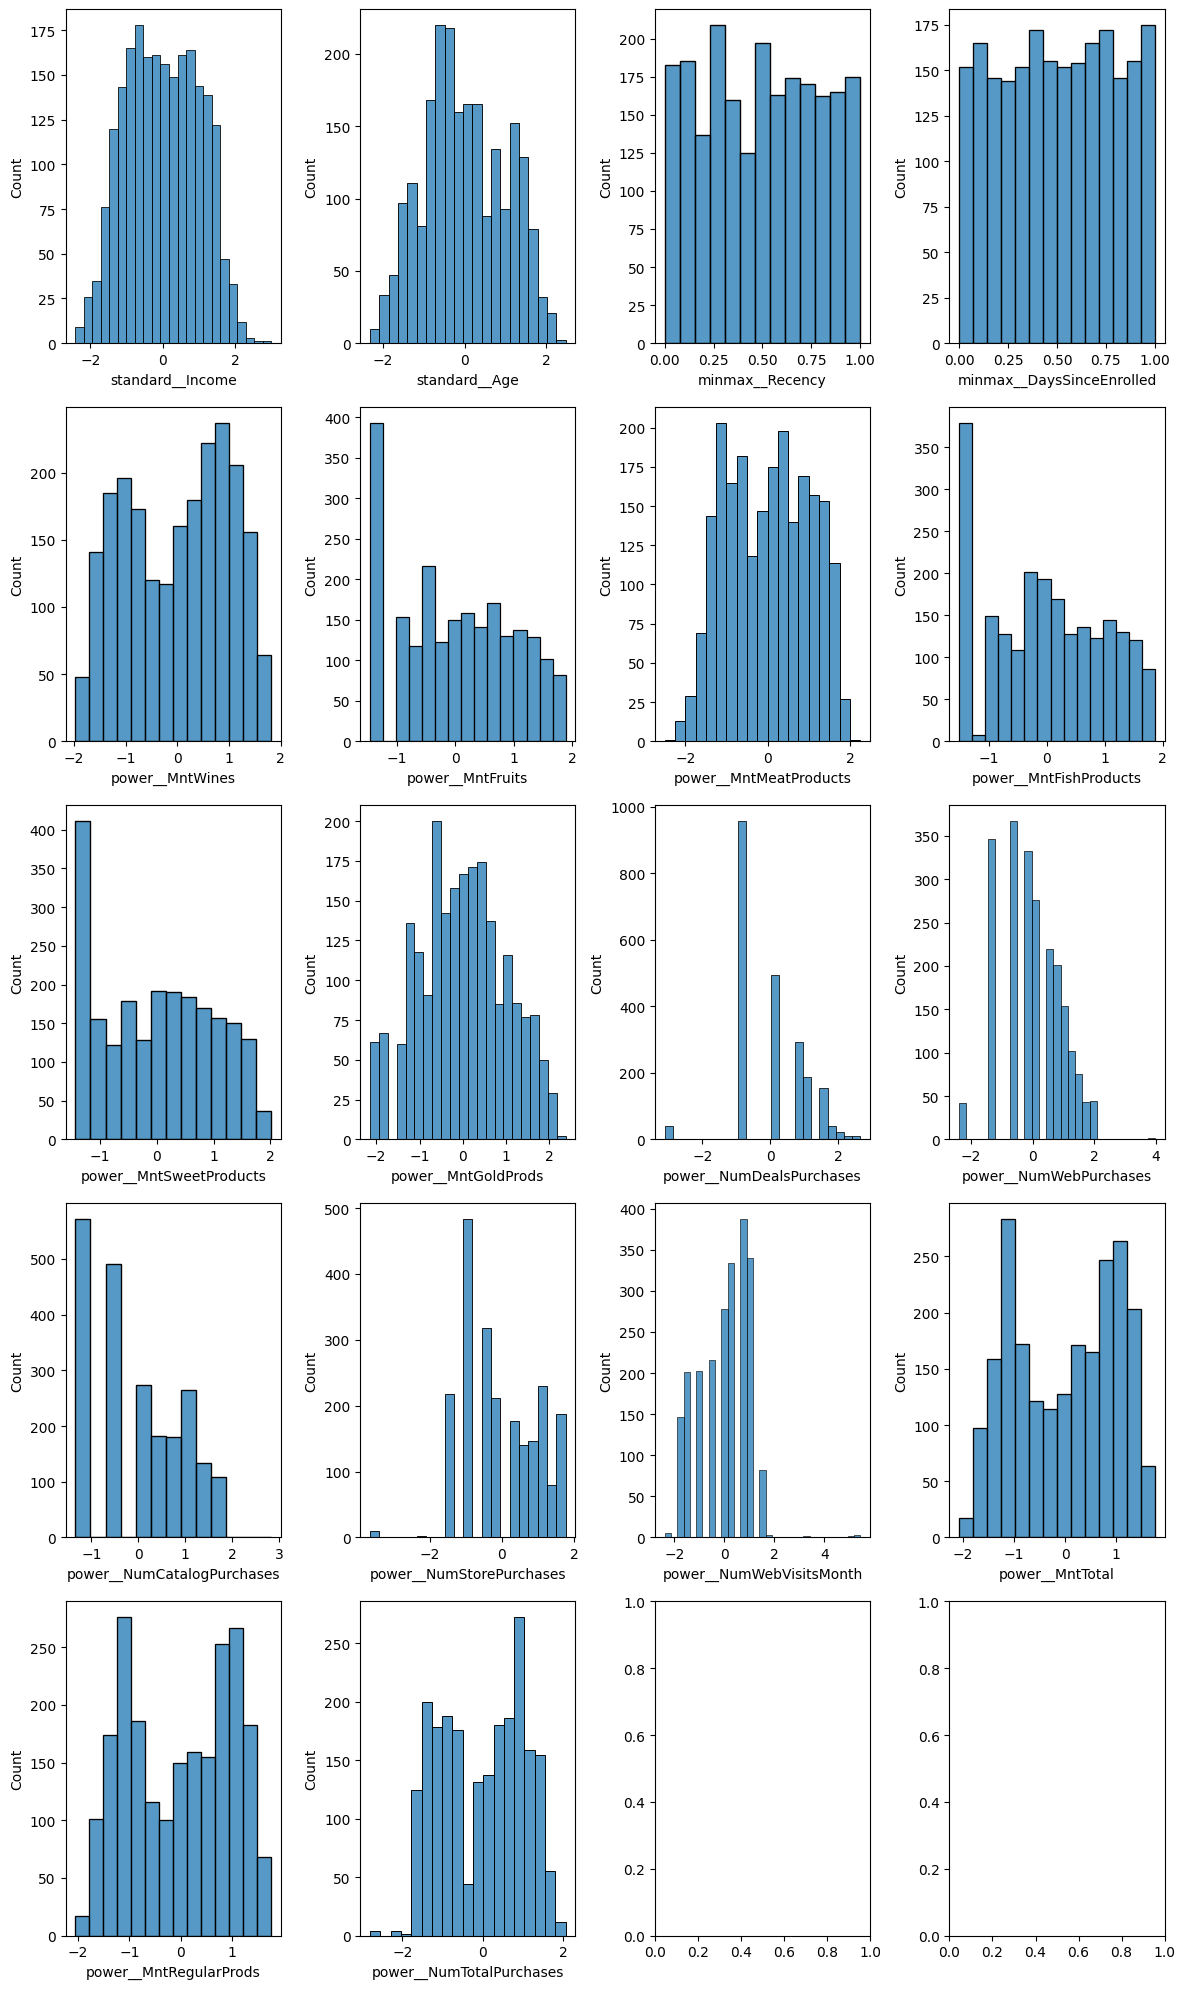

In [12]:
fg, axs = plt.subplots(nrows=5, ncols=4, figsize=(12,20), tight_layout=True)

for ax, features in zip(axs.flatten(), scaled_columns_not_one_hot):
    sns.histplot(data=df_scaled, x=features, ax=ax)

plt.show();

- **Agora é possivel observar como o formato das variáveis mudou, agora os dados estão mais proximos de curvas normais**
- Dessa forma todas os dados estão proximos de intervalo
- Estão mais ou menos na mesma escala, o que facilita o funcionamento do algoritmos de Machine Learning

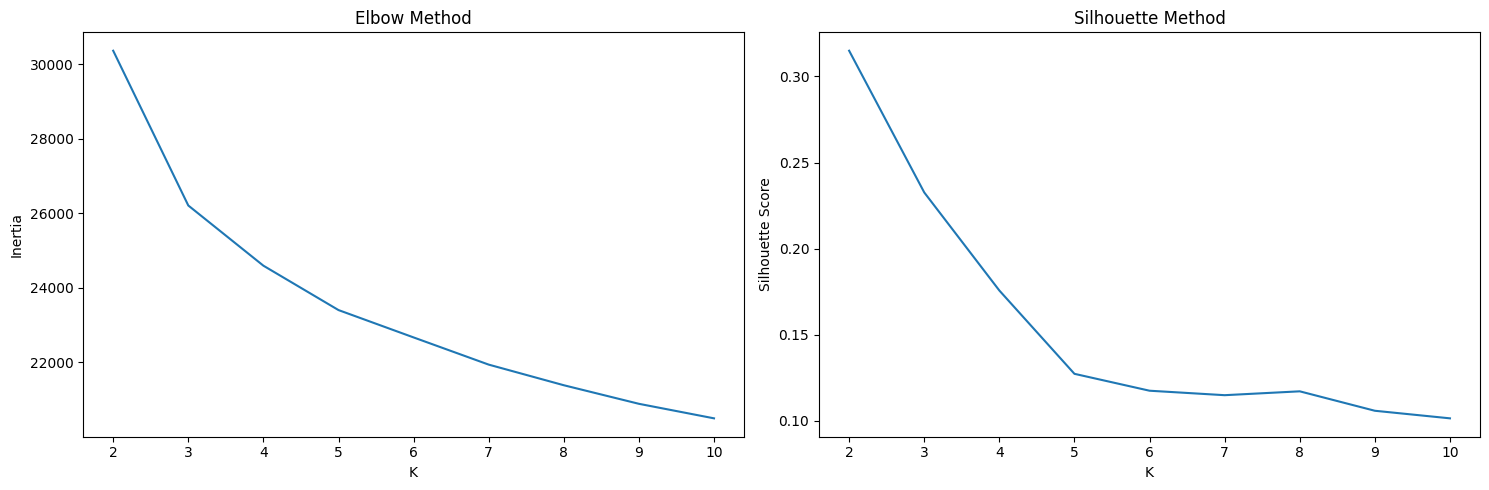

In [13]:
from auxiliary_functions import plot_elbow_silhouette

plot_elbow_silhouette(df_scaled)

## Métodos de Avaliação de Clusters: Elbow e Silhouette

### Método Elbow
O método **Elbow** (cotovelo) é uma técnica visual para determinar o número ideal de clusters em uma análise de agrupamento. Ele é baseado na inércia, que é a soma das distâncias quadradas entre os pontos e o centroide mais próximo. O objetivo é identificar o ponto em que adicionar mais clusters começa a trazer ganhos marginais menores em termos de redução da inércia. 

Em um gráfico de Elbow, a inércia geralmente diminui rapidamente com os primeiros clusters, mas após um certo ponto, a redução começa a desacelerar. Esse ponto, conhecido como o "cotovelo", indica um número de clusters adequado, onde o modelo captura a maior parte da estrutura dos dados sem criar um excesso de clusters.

### Método Silhouette
O **Silhouette Score** é uma métrica que mede a qualidade do agrupamento, avaliando a coesão (quão próximos estão os pontos dentro de um cluster) e a separação (quão distantes estão os clusters entre si). A pontuação varia de -1 a 1, onde:
- **1**: Ponto bem agrupado e distante de outros clusters.
- **0**: Ponto próximo da fronteira entre clusters.
- **-1**: Ponto agrupado incorretamente.

Um valor de Silhouette alto indica que os clusters estão bem definidos, enquanto um valor baixo pode sugerir que os clusters estão muito próximos ou mal definidos.

### Escolha do Número de Clusters
No seu caso, o método Elbow formou um "cotovelo" em **3 clusters**, indicando que, a partir desse ponto, adicionar mais clusters traz poucos benefícios em termos de redução de inércia. Já o **Silhouette Score** teve seu valor máximo em **2 clusters**, sugerindo que dois clusters proporcionam uma melhor separação e coesão dos grupos.

Contudo, a escolha de **3 clusters** parece ser mais adequada. Mesmo que o Silhouette tenha indicado 2 como melhor valor, o número 3 também apresentou um bom resultado. Além disso, o método Elbow sugere que o modelo captura mais variação significativa nos dados ao dividir em 3 grupos. Optar por 3 clusters pode oferecer uma melhor distinção entre os grupos e fornecer mais informações valiosas sobre a estrutura dos dados.

### Conclusão
Ambos os métodos oferecem insights complementares, e a decisão de usar **3 clusters** é justificável, especialmente se os clusters adicionais parecem fornecer uma segmentação mais rica dos dados.


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('clustering', KMeans(n_clusters=3, random_state = RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('One-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [15]:
df_clustered = df.copy()
df_clustered['cluster'] = pipeline['clustering'].labels_
df_clustered

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,2
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,1
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,2
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Graduation,Partner,61223.0,0,1,46,709,43,182,42,...,47,46-60,1341,1094,1,1,0,0,16,0
2201,PhD,Partner,64014.0,2,1,56,406,0,30,0,...,68,61+,444,436,3,1,1,1,15,0
2202,Graduation,Single,56981.0,0,0,91,908,48,217,32,...,33,31-45,1241,1217,0,0,1,1,18,1
2203,Master,Partner,69245.0,0,1,8,428,30,214,80,...,58,46-60,843,782,1,1,0,0,21,0


In [16]:
df_clustered['cluster'].value_counts().sort_index()

cluster
0    743
1    564
2    898
Name: count, dtype: int64

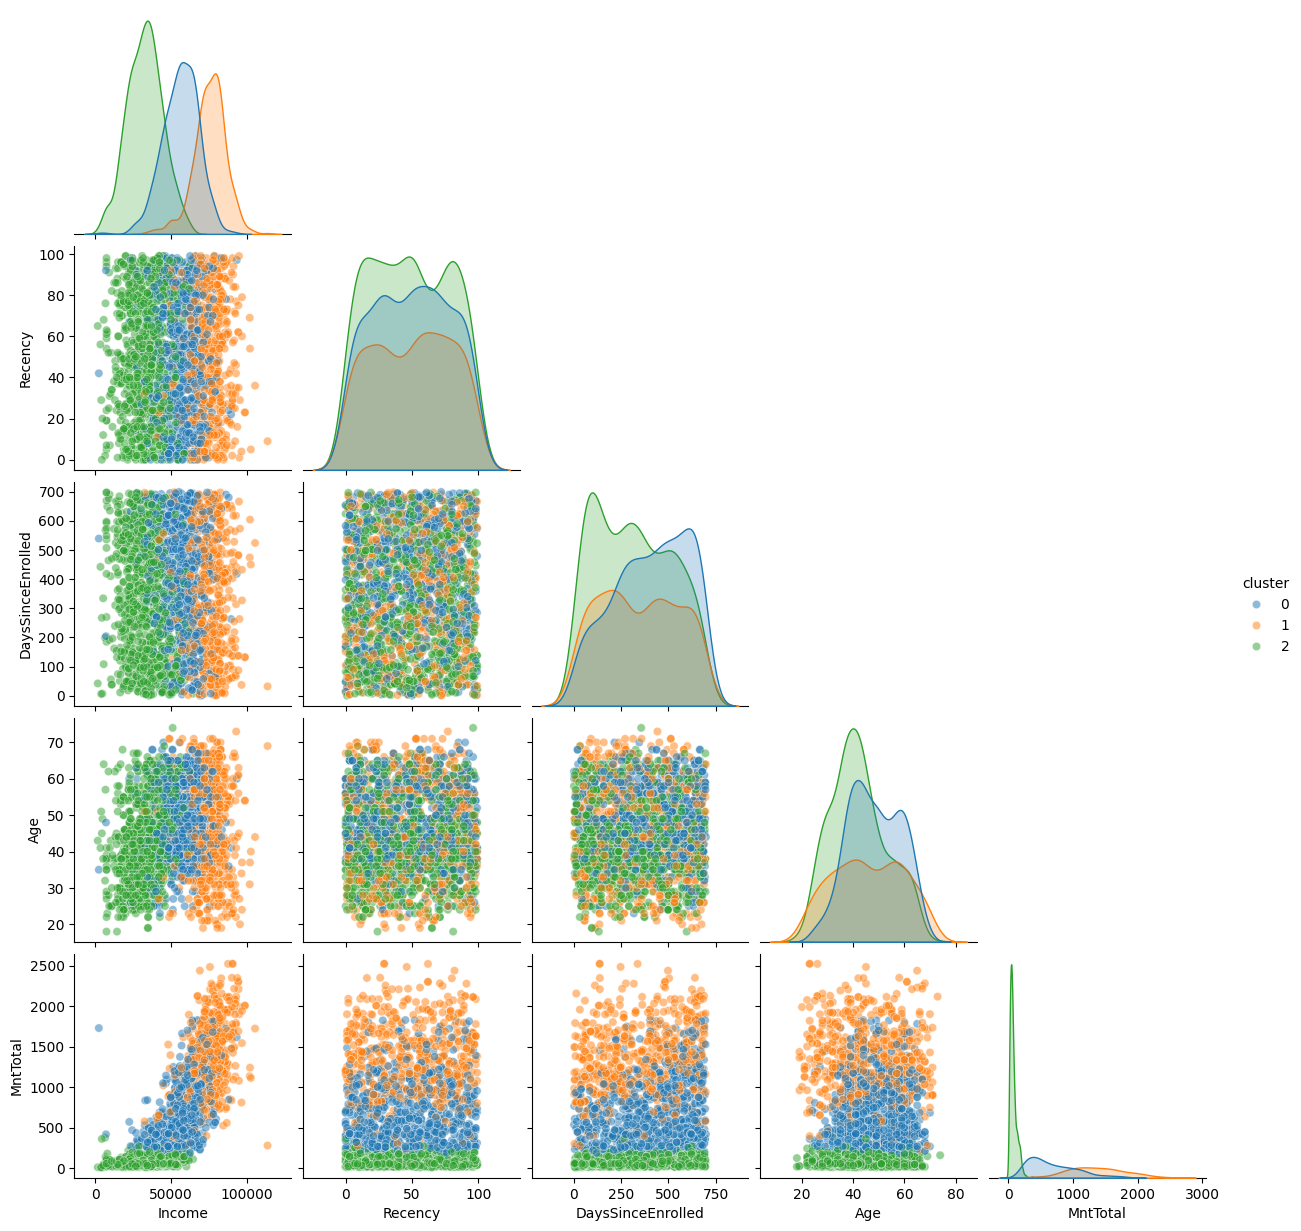

In [17]:
columns_analysis = [
    'Income',
    'Recency',
    'DaysSinceEnrolled',
    'Age',
    'MntTotal'
]

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column='cluster')

- A renda foi importante para definição dos clusters
- Os pontos laranja mostram a maior renda
- Em Recency não foi possivel observar uma mudança relevante, não existe um podrão evidente em relação aos clusters
- Em relação a DaysSinceEnrolled percebe-se que cluster 2 tem um pico evidente com DaysSinceEnrolled menor, ja o cluster 0 mostra um pico com DaysSinceEnrolled maior, dessa forma pode-se entender que:
> O cluster 2 tem clientes mais recentes na base de dados da empresa <br>
> O cluster 0 tem clientes tem clientes que estão a mais tempo na base de dados da empresa

- Na variável Age temos um pico em 40 anos no cluster 2, o cluster 1 parece estar melhor distribuído e o cluster 0 temos um pico que mostra uma idade mais jovem e um segundo pico com idade um pouco mais avançada.
- Já na variável de total gasto (MntTotal) temos um pico do cluster 2 mostra picos de pessoas que gastaram pouco, e também é o cluster com menor renda, já o cluster 1 demonstra um maior gasto dos clientes, e é o cluster com maior renda.
- É possivel observar que a renda parece ter sido o principal critério para a clusterização dos dados, mesmo após a normalização e pré processamento dos dados.

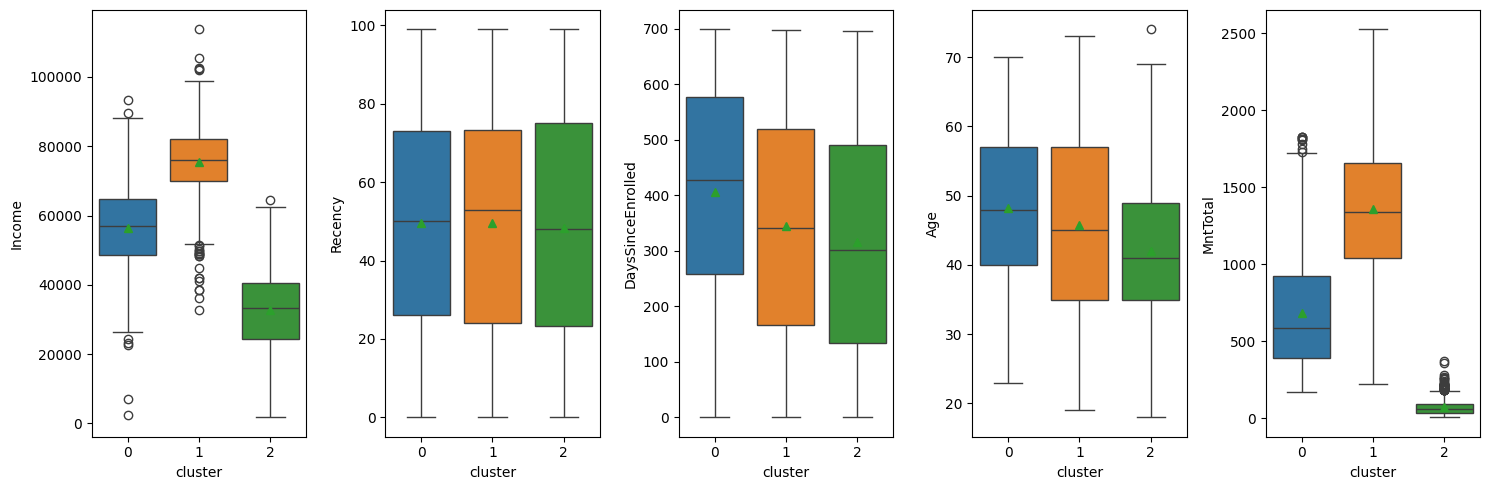

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,5), tight_layout=True)

# Usando a paleta 'tab10'
palette = sns.color_palette("tab10", len(df_clustered['cluster'].unique()))

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x='cluster', y=col, data=df_clustered, ax=ax, showmeans=True, hue='cluster', palette=palette, dodge=False)
    ax.legend_.remove()  # Remover a legenda

plt.show()

- O box evidencia mais as diferenças de clusters devido a renda de cada cliente
- Recency não mostra muitas alterações como visto anteriormente
- Já quantidade total gasta dos clientes respondem melhor a separação dos clientes em relação a renda, mostrando que quanto menor a renda, menor os gastos dos clientes.

In [19]:
columns = [
    'HasChildren',
    'Marital_Status',
    'Education',
    'HasAcceptedCmp',
    'Response',
    'YearsSinceEnrolled',
]

cluster_diff_cols = ['MntTotal', 'Income']

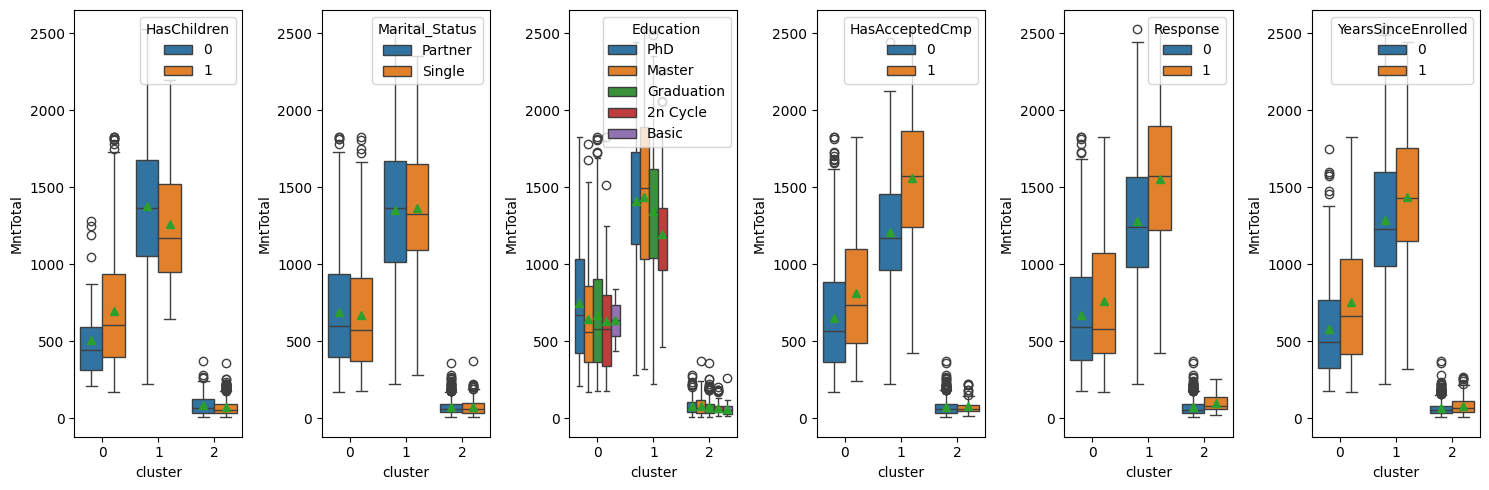

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15,5), tight_layout=True)

for ax, col in zip(axs, columns):
    sns.boxplot(x='cluster', y=cluster_diff_cols[0], data=df_clustered, ax=ax, showmeans=True, hue=col)

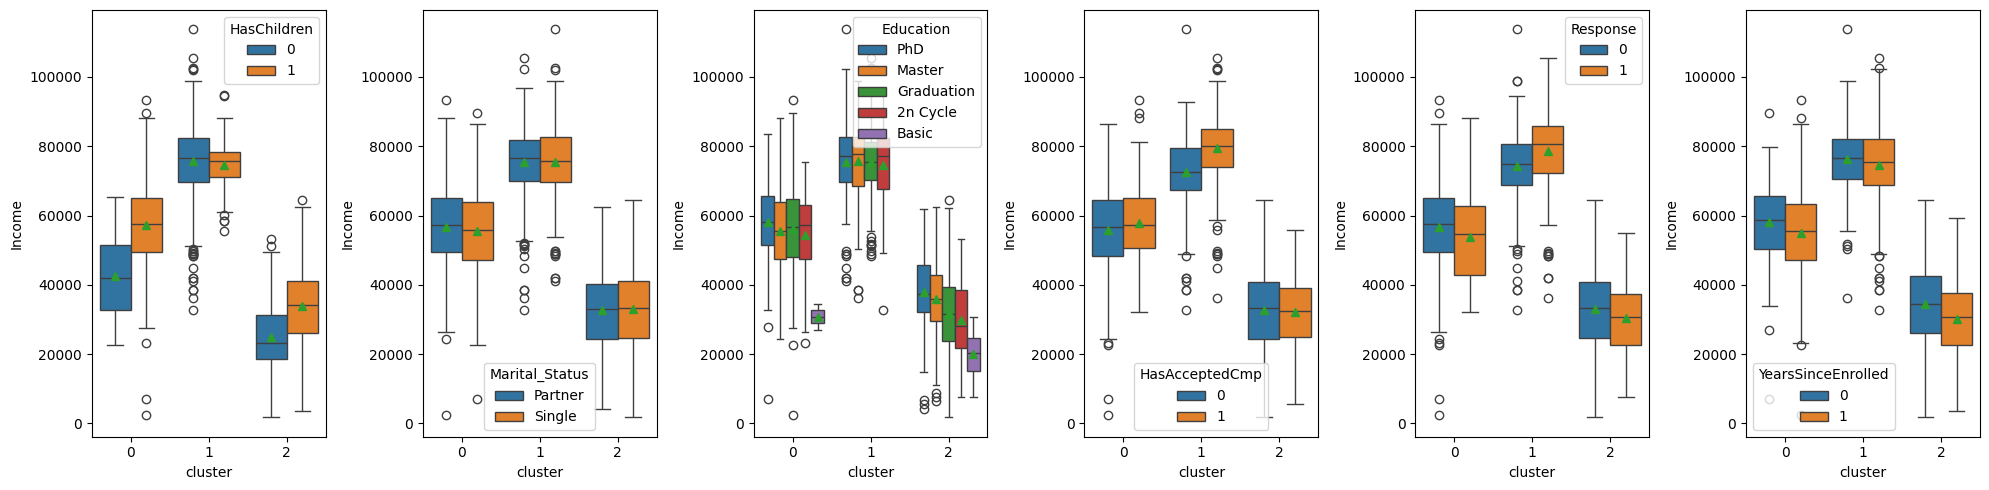

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20,5), tight_layout=True)

for ax, col in zip(axs, columns):
    sns.boxplot(x='cluster', y=cluster_diff_cols[1], data=df_clustered, ax=ax, showmeans=True, hue=col)

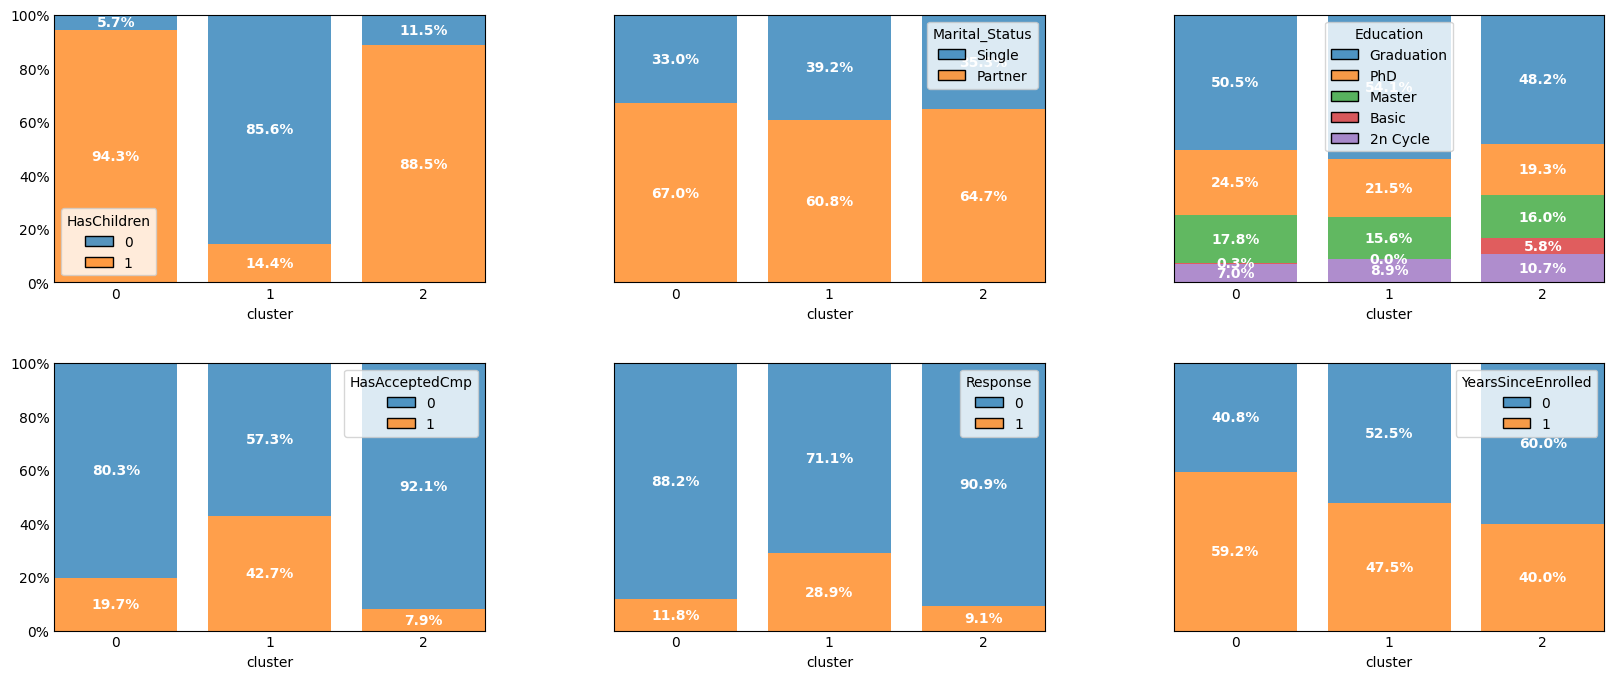

In [22]:
from auxiliary_functions import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=columns
)

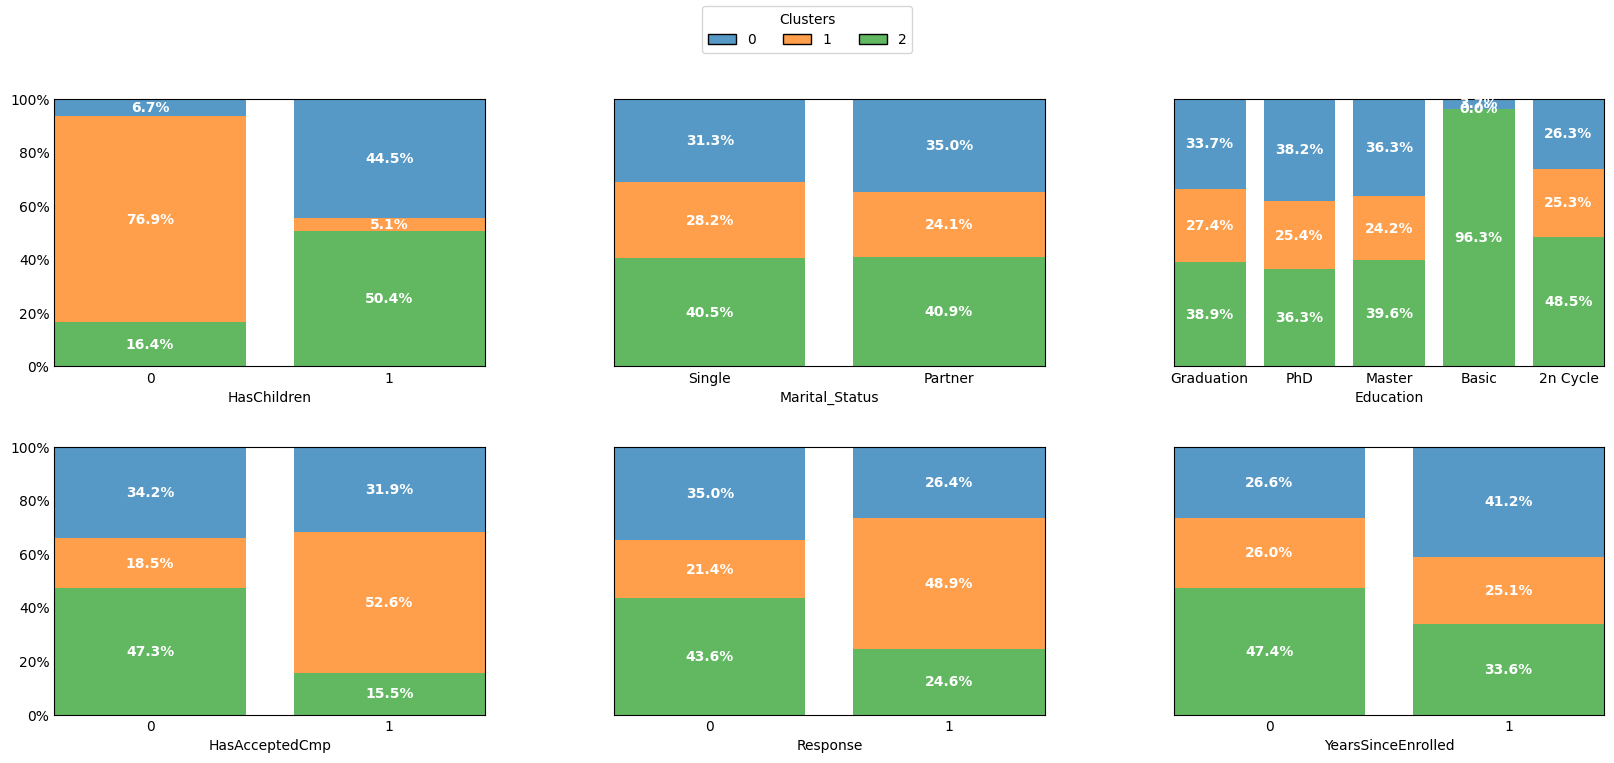

In [23]:
from auxiliary_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(dataframe=df_clustered, columns=columns)

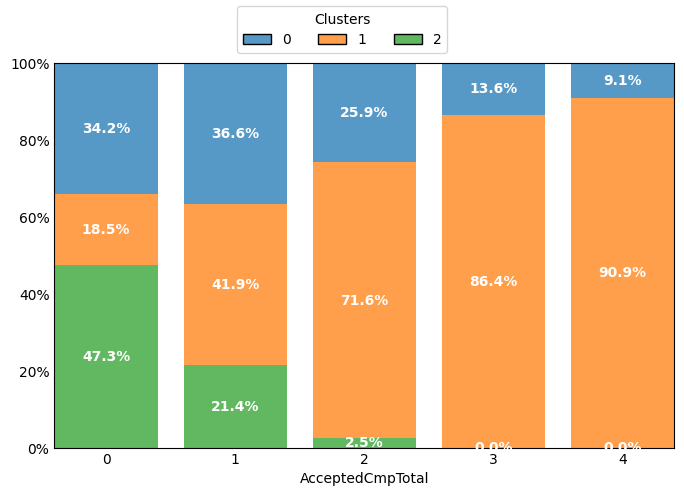

In [25]:
plot_columns_percent_hue_cluster(dataframe=df_clustered, columns=['AcceptedCmpTotal'], rows_cols=(1, 1), figsize=(8,5))

- Dentre todos os clientes que não converteram a uma campanha, 47.3% estão alocadas no cluster 2.
- Clientes que estão dentro do cluster 1, tem uma tendência maior em converter as campanhas, visto que 90% converteram as 4 campanhas feitas.
- Clientes do cluster 2 tem baixa propensão de aceitar campanhas de marketing.

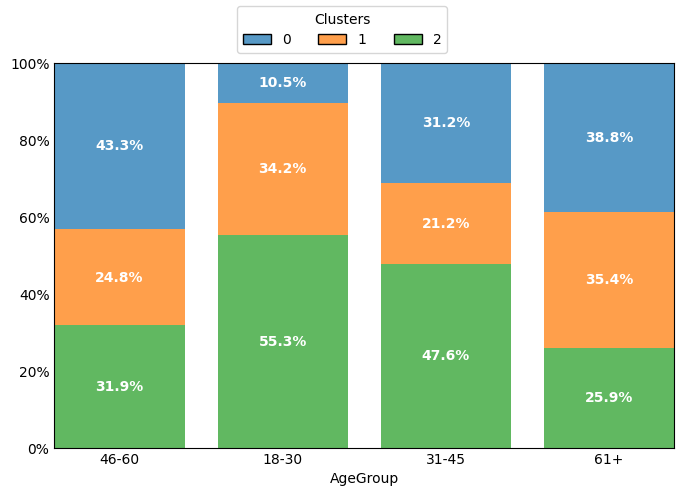

In [28]:
plot_columns_percent_hue_cluster(dataframe=df_clustered, columns=['AgeGroup'], rows_cols=(1, 1), figsize=(8,5))

### Analisando os clusters, podemos dividir da seguinte forma:
- Cluster 0: 
  - Renda intermediária
  - gasto intermediário
  - provalmente tem filhos
  - pode aceitar campanhas
  - pessoas com idade mais elevada
<br>
<br>
- Cluster 1: 
  - Renda alta 
  - gasto alto 
  - muito provalmente não tem filhos
  - mais propenso a aceitar campanhas
  - cluster sem pessoas com escolaridade básica
  - sem um perfil de idade que se destaque
<br>
<br>
- Cluster 2: 
  - Renda baixa 
  - gasto baixo 
  - provalmente tem filhos
  - baixa propensão a aceitar campanhas
  - único cluster com porcentagem significativa de pessoas com escolaridade básica
  - pessoas mais jovens